In [47]:
import numpy as np, curvedsky as cs, plottools as pl, cmb as CMB, cosmology, healpy as hp, local, tools_cmb
from matplotlib.pyplot import *
import warnings
warnings.filterwarnings("ignore")
ac2rad  = np.pi/10800.
deg2rad = np.pi/180.
Tcmb  = CMB.Tcmb    # CMB temperature

In [48]:
lmax = 2048
l = np.linspace(0,lmax,lmax+1)

In [70]:
aobj = local.init_analysis(freq='353',ascale=0.5)

In [71]:
#Tmap = wind * tools_cmb.reduc_map(aobj.dtype,aobj.fimap['s'][1],field=0)
Tmap = tools_cmb.reduc_map(aobj.dtype,aobj.fimap['s'][1],field=0)

In [72]:
Talm = cs.utils.hp_map2alm(2048,lmax,lmax,Tmap)

In [73]:
cl = cs.utils.alm2cl(lmax,Talm)

In [78]:
ibl = np.exp(l*(l+1.)*(5.*ac2rad)**2/8./np.log(2.))

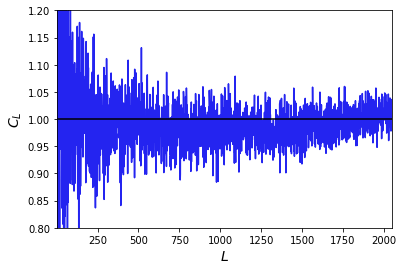

In [79]:
pl.plot_1dstyle(ymin=.8,ymax=1.2)
s = l*(l+1.)/2./np.pi
pl.plot_1dstyle(xmin=2,xmax=2048)
plot(l,(cl*ibl)/aobj.lcl[0] )
axhline(1,color='k')

In [14]:
Qmap = tools_cmb.reduc_map(aobj.dtype,aobj.fimap['s'][1],field=1)
Umap = tools_cmb.reduc_map(aobj.dtype,aobj.fimap['s'][1],field=2)

In [15]:
Ealm, Balm = cs.utils.hp_map2alm_spin(2048,lmax,lmax,2,Qmap,Umap)

In [16]:
EE = cs.utils.alm2cl(lmax,Ealm)
BB = cs.utils.alm2cl(lmax,Balm)

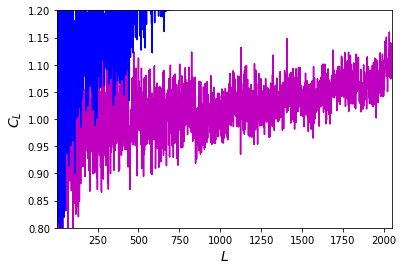

In [45]:
pl.plot_1dstyle(xmin=2,xmax=2048,ymin=.8,ymax=1.2)
plot(EE*ibl/aobj.lcl[1],color='m')
plot(BB*ibl/aobj.lcl[2],color='b')